In [ ]:
# I am doing this in colab so please change the  code to import csv file using eric code in local machine
import pandas as pd
train_df = pd.read_csv('train_clean.csv')
train_df.head()

,Clean_text,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,my favourite food is anything i did not have t...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,now if he does off himself everyone will think...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,why the fuck is bayless isoing,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,to make her feel threatened,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,dirty southern wankers,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
test_df = pd.read_csv('test_clean.csv')
test_df.head()

,Clean_text,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,i am really sorry about your situation frownin...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,it is wonderful because it is awful at not with,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,kings fan here good luck to you guys ! will be...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,i did not know that thank you for teaching me ...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,they got bored from haunting earth for thousan...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
train_with_emotion_df = pd.concat([train_df, train_df.apply(lambda row: row[row == 1].index[0], axis=1)], axis=1)
train_with_emotion_df.rename(columns={0: 'emotion'}, inplace=True)
# train_with_emotion_df.drop(train_with_emotion_df.columns.difference(['Clean_text','emotion']), 1, inplace=True)
train_with_emotion_df = train_with_emotion_df[['Clean_text','emotion']].copy()

In [ ]:

positiveSet = ['Clean_text','admiration','desire','love','amusement','excitement',
               'optimism','approval','gratitude','pride','caring','joy','relief']
negativeSet = ['Clean_text','anger','disgust','nervousness','annoyance','embarrassment',
               'remorse','disappointment', 'fear', 'sadness', 'disapproval', 'grief']
neutralSet = ['Clean_text','confusion','curiosity','realization','surprise']



In [ ]:
##change this ti eric code to import terain and test csv files
def loadTrainData():
  df = pd.read_csv('train_clean.csv')
  return df

def loadTestData():
  df = pd.read_csv('test_clean.csv')
  return df

In [ ]:
def getEmotionTestTrainDF( set ):
    trainSet = pd.DataFrame( loadTrainData() )[ set ]
    testSet = pd.DataFrame( loadTestData() )[ set ]

    trainDF = trainSet.copy()
    testDF = testSet.copy()

    # remove all rows without emotion (all rows with '0' emotion columns)
    trainDF = trainDF[ ~trainDF[set[1:]].eq(0).all(axis=1) ]
    testDF = testDF[ ~testDF[set[1:]].eq(0).all(axis=1) ]

    # just to do a sanity check, let's make sure all irrelevant rows have been removed
    print( '\ndf shapes after cleanup: \ntrain - \told: {} \tnew: {} \ntest - \t\told: {} \tnew: {}'.format(trainSet.shape, trainDF.shape, testSet.shape, testDF.shape) )

    # now that all rows have (associated) set of emotions, conflate!
    trainDF_conflated = pd.concat([trainDF, trainDF.apply(lambda row: row[row == 1].index[0], axis=1)], axis=1)
    trainDF_conflated.rename(columns={0: 'emotion'}, inplace=True)
    trainDF_conflated = trainDF_conflated[['Clean_text','emotion']].copy()

    testDF_conflated = pd.concat([testDF, testDF.apply(lambda row: row[row == 1].index[0], axis=1)], axis=1)
    testDF_conflated.rename(columns={0: 'emotion'}, inplace=True)
    testDF_conflated = testDF_conflated[['Clean_text','emotion']].copy()

    return trainDF, testDF, trainDF_conflated, testDF_conflated

In [ ]:
posTrainDF, posTestDF, posTrainDF_conflated, posTestDF_conflated = getEmotionTestTrainDF( positiveSet )
negTrainDF, negTestDF, negTrainDF_conflated, negTestDF_conflated = getEmotionTestTrainDF( negativeSet )
neuTrainDF, neuTestDF, neuTrainDF_conflated, neuTestDF_conflated = getEmotionTestTrainDF( neutralSet )


df shapes after cleanup: 
train - 	old: (43410, 13) 	new: (17410, 13) 
test - 		old: (5427, 13) 	new: (2104, 13)

df shapes after cleanup: 
train - 	old: (43410, 12) 	new: (9839, 12) 
test - 		old: (5427, 12) 	new: (1262, 12)

df shapes after cleanup: 
train - 	old: (43410, 5) 	new: (5367, 5) 
test - 		old: (5427, 5) 	new: (677, 5)


##My Experiment

In this experiment i want to create a model that can classify the emotion to either positive, negative or neutral based on the input text. My goal here is not to classify it to the minute emotion level here maybe in the further experiments i will try to achieve that.

I recommend running the below experiment on a GPU as it would drastically increase the speed of execution. (I ran it on my mac first it showed around 9 hours to complete 1 epoch. So i switched to colab to utilize free GPU)

In [ ]:
# converting the output labels to categorical values for positive, negative, neutral
# Code by Gautham
def add_label(data_frame, category):
    df = data_frame.copy()
    df["label"] = category
    return df

train_pos_df = add_label(posTrainDF_conflated,"positive")
train_neg_df = add_label(negTrainDF_conflated,"negative")
train_neu_df = add_label(neuTrainDF_conflated,"neutral")

test_pos_df = add_label(posTestDF_conflated,"positive")
test_neg_df = add_label(negTestDF_conflated,"negative")
test_neu_df = add_label(neuTestDF_conflated,"neutral")

print("Positive train datasets")
print(train_pos_df.head())
print("Negative train datasets")
print(train_neg_df.head())
print("Neutral train datasets")
print(train_neu_df.head())


print("Positive test datasets")
print(test_pos_df.head())
print("Negative test datasets")
print(test_neg_df.head())
print("Neutral test datasets")
print(test_neu_df.head())

Positive train datasets
                                           Clean_text     emotion     label
6   yes i heard abt the fuck bombs ! that has to b...   gratitude  positive
7   we need more boards and to create a bit more s...      desire  positive
8   damn youtube and outrage drama is super lucrat...  admiration  positive
11  aww she will probably come around eventually i...   amusement  positive
13  r sleeptrain might be time for some sleep trai...      caring  positive
Negative train datasets
                                           Clean_text    emotion     label
2                      why the fuck is bayless isoing      anger  negative
3                         to make her feel threatened       fear  negative
4                              dirty southern wankers  annoyance  negative
14  name same fucking problem slightly better comm...  annoyance  negative
15  shit i guess i accidentally bought a pay per v...  annoyance  negative
Neutral train datasets
                       

In [ ]:
# Code by Gautham
total_train_lenght = len(train_pos_df["Clean_text"]) +len(train_neg_df["Clean_text"])+len(train_neu_df["Clean_text"])
ratio_of_pos = len(train_pos_df["Clean_text"])/total_train_lenght
ratio_of_neg = len(train_neg_df["Clean_text"])/total_train_lenght
ratio_of_neu = len(train_neu_df["Clean_text"])/total_train_lenght

print("the Positive, Negative, Neutal train ratio are as follows")
print("Positive - " + str(ratio_of_pos))
print("Negative - " + str(ratio_of_neg))
print("Neutral - " + str(ratio_of_neu))

the Positive, Negative, Neutal train ratio are as follows
Positive - 0.5337870983566347
Negative - 0.3016617610988472
Neutral - 0.16455114054451803


The stats are as follows
Pos Train -> 17410, Pos Test -> 2104 Neg Train -> 9839, Neg Test -> 1262 Neu Train -> 5367, Neu Test -> 667
we can observe that the train dataset is an imbalaned dataset with positive text are greater that 50% followed by negative text ~ 30% and Neutral Comments ~16%

In [ ]:
# Code by Gautham
# Creating Test and train dataframes by combining all the positive, negative, neutral dataframes

import numpy as np
np.random.seed(1)

#creating a combined dataframe for train
train_df =pd.concat([train_pos_df, train_neg_df, train_neu_df], axis=0)
# randomly shuffling the dataframe so that all the rows will be randomly mixed.
train_df = train_df.sample(frac=1, random_state=1).reset_index(drop=True)

#creating a combined dataframe for test no need shuffle test df as we are not using this to train our model
test_df = pd.concat([test_pos_df, test_neg_df, test_neu_df], axis=0)

print(train_df.head(10))

                                          Clean_text         emotion     label
0                                      i love cowboy            love  positive
1  i promise you it would for most people you are...  disappointment  negative
2  congratulations ! your kids are very lucky to ...      admiration  positive
3  i am happy you were able to have a child ! tha...             joy  positive
4              i appreciate this reference very much      admiration  positive
5  literally loving this where are all the guys l...            love  positive
6  so is liking name enormous eyebrows biological...      admiration  positive
7      what are the ajax players complaining about ?       curiosity   neutral
8  tell her to stop eating shit and start using m...         disgust  negative
9  i am reading homegoing by name and it is so go...     realization   neutral


In [ ]:
# Code by Gautham
#creating a dict to map the lables
label_dict = {
    "positive":0,
    "negative":1,
    "neutral":2
}
train_df.label = train_df["label"].map(label_dict)
test_df.label = test_df["label"].map(label_dict)

In [ ]:
# Code by Gautham
#extracting the text from train dataframe
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(train_df["Clean_text"],
                                                  train_df["label"],
                                                  test_size=0.1,
                                                  random_state=34,
                                                  stratify=train_df["label"])


test_text = test_df["Clean_text"]
Y_test = test_df["label"]
print(Y_val)

22474    0
3396     0
6142     1
7369     0
29320    0
        ..
3288     0
6531     2
28594    0
21628    2
30556    1
Name: label, Length: 3262, dtype: int64


In [ ]:
# Code by Vamsi Pusapati
from transformers import BertTokenizer
# using the pretrained tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
train_encoding_texts = tokenizer.batch_encode_plus(X_train, padding="max_length", truncation=True, return_tensors="pt",)
val_encoding_texts = tokenizer.batch_encode_plus(X_val, padding="max_length", truncation=True, return_tensors="pt",)


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
# Code by Vamsi Pusapati
import torch

train_input = train_encoding_texts['input_ids']
train_attention = train_encoding_texts['attention_mask']
train_labels = torch.tensor(Y_train.values)

val_input_ids_val = val_encoding_texts['input_ids']
val_attention_masks_val = val_encoding_texts['attention_mask']
val_labels_val = torch.tensor(Y_val.values)

In [ ]:
# Code by Vamsi Pusapati
from torch.utils.data import TensorDataset

train_tensor_data = TensorDataset(train_input, train_attention, train_labels)

val_tensor_data = TensorDataset(val_input_ids_val, val_attention_masks_val, val_labels_val)

In [ ]:
# Code by Vamsi Pusapati
from transformers import BertForSequenceClassification
#using an existing BertForSequenceClassification model
model = BertForSequenceClassification.from_pretrained(
                                      'bert-base-uncased',
                                      num_labels = 3,
                                      output_attentions = True,
                                      output_hidden_states = False
                                     )

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
# Code by Vamsi Pusapati
import random
#setting seed value so that i can get the same random samples.
seed = 10
torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
random.seed(seed)
np.random.seed(seed)

In [ ]:
# Code by Vamsi Pusapati
from torch.utils.data import DataLoader, RandomSampler
batch_size = 16

dataloader_train = DataLoader(
    train_tensor_data,
    sampler=RandomSampler(train_tensor_data),
    batch_size=batch_size
)

dataloader_val = DataLoader(
    val_tensor_data,
    sampler=RandomSampler(val_tensor_data),
    batch_size=batch_size
)

In [ ]:
# Code by Vamsi Pusapati
from transformers import AdamW, get_linear_schedule_with_warmup
optimizer = AdamW(
    model.parameters(),
    lr = 1e-4,
    eps = 1e-6
)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
# Code by Vamsi Pusapati
"""I didont have GPU in my PC so i am using google colab to run the code on GPU
#previously i tried with 5 epochs and the executio stopped around 4 epochs due to GPU
compute time exceded the time limitation so limiting the epoch to 3."""
epochs = 3

scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=0,
    num_training_steps = len(dataloader_train)*epochs
)

In [27]:
# Code by Vamsi Pusapati
import numpy as np
from sklearn.metrics import f1_score

def get_f1_score(preds, labels):
    preds = np.argmax(preds, axis=1).flatten()
    label = labels.flatten()
    return f1_score(label, preds, average = 'weighted')

"""
    The below function is used to get the accuracy of each labels
"""
def get_accuracy_perclass(preds, labels):
    label_inverse = {v: k for k, v in label_dict.items()}

    preds = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()

    for label in np.unique(labels_flat):
        y_preds = preds[labels_flat==label]
        y_true = labels_flat[labels_flat==label]
        accuracy = len(y_preds[y_preds==label])/ len(y_true)
        print(f'Class: {label_inverse[label]}')
        print(f'Accuracy:{len(y_preds[y_preds==label])}/{len(y_true)} = {accuracy}\n')

In [ ]:
# Code by Vamsi Pusapati
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)
print(device)

cuda


In [ ]:
# Code by Vamsi Pusapati
def evaluate(batch_dataloder):

    model.eval()

    loss_val_total = 0
    predictions, true_vals = [], []

    for batch in batch_dataloder:
        batch = tuple(bat.to(device) for bat in batch)
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():
            outputs = model(**inputs)

        loss = outputs[0]
        predicts = outputs[1]
        loss_val_total += loss.item()

        predicts = predicts.detach().cpu().numpy()
        labels= inputs['labels'].cpu().numpy()
        predictions.append(predicts)
        true_vals.append(labels)

    loss_val_avg = loss_val_total/len(dataloader_val)

    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)

    return loss_val_avg, predictions, true_vals

In the evaluation function i am doing the following


1.   First i am sending the dataloaders and using the Berth model i am evaluating by passing inputs.
2.    inouts For I am creating a inputs dictionary of "input_ids", "attention_mask", "labels"
3.  Once i get the model outputs i am calculating the loss , predictions, and i am returing the total loss and the predicted value and the original valus



In the below code i am training the model. i am using tqdm library to show the progress on each step.


In [24]:
# Code by Vamsi Pusapati
from tqdm import tqdm

for epoch in tqdm(range(1, epochs+1)):
    model.train()
    total_train_loss = 0

    progress_bar = tqdm(dataloader_train,
                        desc='Epoch {:1d}'.format(epoch),
                        leave=False,
                        disable=False)

    for batch in progress_bar:
        model.zero_grad()

        batch = tuple(bat.to(device) for bat in batch)

        inputs = {
            'input_ids': batch[0],
            'attention_mask': batch[1],
            'labels': batch[2]
        }

        outputs = model(**inputs)
        loss = outputs[0]
        total_train_loss +=loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()


        scheduler.step()

        progress_bar.set_postfix({'training loss': '{:.4f}'.format(loss.item()/len(batch))})



    tqdm.write('\nEpoch {epoch}')

    avg_training_loss = total_train_loss/len(dataloader_train)
    tqdm.write(f'Training loss: {avg_training_loss}')

    val_loss, predictions, true_vals = evaluate(dataloader_val)
    val_f1 = get_f1_score(predictions, true_vals)
    tqdm.write(f'Validation loss: {val_loss}')
    tqdm.write(f'F1 Score (weighted): {val_f1}')

  0%|          | 0/3 [42:44<?, ?it/s]


Epoch {epoch}
Training loss: 0.6048201410460212


 33%|███▎      | 1/3 [44:28<1:28:57, 2668.72s/it]

Validation loss: 0.5457044273030525
F1 Score (weighted): 0.7739689104849554



 33%|███▎      | 1/3 [1:27:10<1:28:57, 2668.72s/it]


Epoch {epoch}
Training loss: 0.46794488246499355


 67%|██████▋   | 2/3 [1:28:54<44:27, 2667.14s/it]  

Validation loss: 0.5557995826444205
F1 Score (weighted): 0.7872336905437135



 67%|██████▋   | 2/3 [2:11:35<44:27, 2667.14s/it]


Epoch {epoch}
Training loss: 0.33602390468161175


100%|██████████| 3/3 [2:13:20<00:00, 2666.71s/it]

Validation loss: 0.6247609762803596
F1 Score (weighted): 0.7880614701008887


In [28]:
# Code by Vamsi Pusapati
get_accuracy_perclass(predictions, true_vals)

Class: positive
Accuracy:1509/1741 = 0.8667432510051695

Class: negative
Accuracy:726/984 = 0.7378048780487805

Class: neutral
Accuracy:339/537 = 0.6312849162011173



# Predicting on test data

In [29]:
# Code by Vamsi Pusapati
label_dict = {
    "positive":0,
    "negative":1,
    "neutral":2
}
Y_test = test_df["label"]
Y_test.label = Y_test.map(label_dict)

In [30]:
# Code by Vamsi Pusapati
test_encoding_texts = tokenizer.batch_encode_plus(test_text, padding="max_length", truncation=True, return_tensors="pt",)

In [31]:
# Code by Vamsi Pusapati
test_input = test_encoding_texts['input_ids']
test_attention = test_encoding_texts['attention_mask']
test_labels = torch.tensor(Y_test.values)

In [32]:
# Code by Vamsi Pusapati
test_tensor_data = TensorDataset(test_input, test_attention, test_labels)

In [33]:
# Code by Vamsi Pusapati
batch_size = 16
dataloader_test = DataLoader(
    test_tensor_data,
    sampler=RandomSampler(test_tensor_data),
    batch_size=batch_size
)


In [34]:
# Code by Vamsi Pusapati
test_loss, test_predictions, test_true_vals = evaluate(dataloader_test)

In [35]:
# Code by Vamsi Pusapati
get_accuracy_perclass(test_predictions, test_true_vals)

Class: positive
Accuracy:1895/2104 = 0.9006653992395437

Class: negative
Accuracy:966/1262 = 0.7654516640253566

Class: neutral
Accuracy:440/677 = 0.6499261447562777



In [36]:
# Code by Vamsi Pusapati
#F1 Score it is important as the dataset is highly imbalanced

print(get_f1_score(test_predictions, test_true_vals))


0.8143053043344404


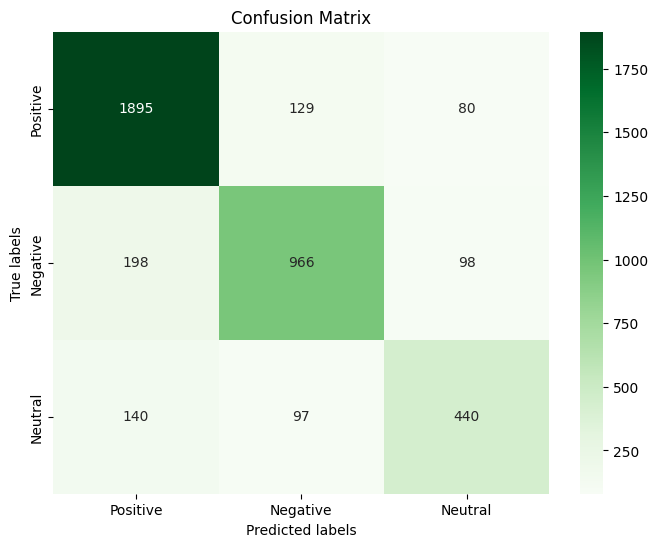

In [55]:
# Code by Vamsi Pusapati
#Confusion Matrix

import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
class_names = ["Positive", "Negative", "Neutral"]

test_preds = np.argmax(test_predictions, axis=1).flatten()
conf_matrix = confusion_matrix(test_true_vals, test_preds)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens',
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.savefig('test_confusion_matrix.png')
plt.show()

In [38]:
from sklearn.metrics import classification_report, accuracy_score
f1 = classification_report(test_true_vals, test_preds, target_names=[
                            "positive", "negative", "neutral"])


print(f"\nF1 Score:\n{f1}")



F1 Score:
              precision    recall  f1-score   support

    positive       0.85      0.90      0.87      2104
    negative       0.81      0.77      0.79      1262
     neutral       0.71      0.65      0.68       677

    accuracy                           0.82      4043
   macro avg       0.79      0.77      0.78      4043
weighted avg       0.81      0.82      0.81      4043



In [74]:
predicted_Neutral_given_true_positive = conf_matrix[0][2]
total_true_positives = sum(conf_matrix[0])

percentage_of_false_Neutral_given_positive = predicted_Neutral_given_true_positive/total_true_positives


print("percentage of predicted Neutral for a given Positive text = " + str(percentage_of_false_Neutral_given_positive))

percentage of predicted Neutral for a given Positive text = 0.03802281368821293


In [75]:
predicted_Neutral_given_true_negative = conf_matrix[1][2]
total_true_negatives = sum(conf_matrix[1])

percentage_of_false_Neutral_given_negative = predicted_Neutral_given_true_negative/total_true_negatives


print("percentage of predicted Neutral for a given Negative text = " + str(percentage_of_false_Neutral_given_negative))

percentage of predicted Neutral for a given Negative text = 0.07765451664025357


# Observations


I have created a baseline BERT model using inbuilt pytorch models. I have loaded the train and test csv files. For the test csv i further split the data to have a train dataset and a validation dataset (0.9 split). And I trained the model. The below are the observations of the model that ran on the test dataset. (The test data is not included in my training process).

1. The model performed decently on all the three labels ie. on (Positive, Negative, Neutral) with accuracy of 90.00% (1894/2104) on Positive texts, 76.46%(965/1262) on the Negative texts, 63.95(433/677) on Neutral Texts

2. As the data is highly imbalanced overall accuracy does not show the true performance of the model, so i calculated the F1 score. The F1 Score for the model that ran on test data is around 0.8117. For this f1 score the baseline model is perfroming decently in classifying the texts

3. The model is silghtly biased towards the Positive comments. From the confusion matrix we can see that the most of the mis-classified Negative and Neutral comments are classified as positive comments. (It is expected as we have more number of positive data and due to GPU restraint I trained only for 3 epochs. Based on the losses from each epoch the model still not converged after 3 epochs which shows the capability of the model to perform well on further training).



# Future scope

1. To increase the performance of the model the model need to be trained further by increasing the number of epochs.

2. The model can be fine tuned by changing the learning rate (lr), number of training steps

3. To further classify the emotions we can create a two or multi stage ensembled model which further classify the text into minute detail emotions on the second or further stages (based on the ensemble)

# Saving the Models and dataframes from colab

In [39]:
torch.save(model.state_dict(), "berth_model_state_dict.pth")

In [46]:
torch.save(model.state_dict(), "berth_model_state_dict.pt")

In [40]:
from google.colab import files
files.download('berth_model_state_dict.pth')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [41]:
test_df.head()

,Clean_text,emotion,label
1,it is wonderful because it is awful at not with,admiration,0
2,kings fan here good luck to you guys ! will be...,excitement,0
3,i did not know that thank you for teaching me ...,gratitude,0
5,thank you for asking questions and recognizing...,gratitude,0
6,you are welcome,gratitude,0


In [42]:
test_df["predict_label"] = test_preds

In [43]:
test_df.head()

,Clean_text,emotion,label,predict_label
1,it is wonderful because it is awful at not with,admiration,0,1
2,kings fan here good luck to you guys ! will be...,excitement,0,1
3,i did not know that thank you for teaching me ...,gratitude,0,2
5,thank you for asking questions and recognizing...,gratitude,0,0
6,you are welcome,gratitude,0,0


In [48]:
rev_label_dict = {
    0: "positive",
    1: "negative",
    2: "neutral"
}
go_emotions_test_prediction = test_df.copy()

go_emotions_test_prediction.label = go_emotions_test_prediction.label.map(rev_label_dict)
go_emotions_test_prediction.predict_label = go_emotions_test_prediction.predict_label.map(rev_label_dict)

In [49]:
go_emotions_test_prediction.head()

,Clean_text,emotion,label,predict_label
1,it is wonderful because it is awful at not with,admiration,positive,negative
2,kings fan here good luck to you guys ! will be...,excitement,positive,negative
3,i did not know that thank you for teaching me ...,gratitude,positive,neutral
5,thank you for asking questions and recognizing...,gratitude,positive,positive
6,you are welcome,gratitude,positive,positive


In [50]:
go_emotions_test_prediction.to_csv("test_predicted_emotions.csv")

In [44]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [54]:
go_emotions_test_prediction

,Clean_text,emotion,label,predict_label
1,it is wonderful because it is awful at not with,admiration,positive,negative
2,kings fan here good luck to you guys ! will be...,excitement,positive,negative
3,i did not know that thank you for teaching me ...,gratitude,positive,neutral
5,thank you for asking questions and recognizing...,gratitude,positive,positive
6,you are welcome,gratitude,positive,positive
...,...,...,...,...
5386,the adventure starts in the year fuck wait rea...,curiosity,neutral,negative
5394,dammit you know i proof read this and i though...,confusion,neutral,neutral
5399,can not believe me and my family were going to...,surprise,neutral,positive
5400,now we just need to kill name if name was not ...,realization,neutral,positive


In [ ]:
while True:
    pass
